# Processing API request

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import time
import datetime
import numpy as np

import matplotlib.pyplot as plt 

from eolearn.io import SentinelHubProcessingInput, SentinelHubWCSInput
from eolearn.core import FeatureType
from sentinelhub import CRS, BBox, DataSource

In [2]:
bbox = BBox(bbox=[268892, 4624365, 268892+1000, 4624365+1000], crs=CRS.UTM_33N) 
time_interval = ('2017-12-15', '2018-1-30')
maxcc = 0.8
time_difference = 60

In [3]:
task = SentinelHubProcessingInput('test_feature', size_x=100, size_y=100, time_range=time_interval, bbox=bbox, maxcc=maxcc, time_difference=time_difference)
eopatch_proc = task.execute()
proc_images = eopatch_proc[(FeatureType.DATA, 'test_feature')]

# Request the same image with the SentinelHubWCSInput for comparison

In [4]:
input_task = SentinelHubWCSInput(
    layer='BANDS-S2-L1C',
    resx='10m',
    resy='10m',
    maxcc=maxcc,
    data_source=DataSource.SENTINEL2_L1C
)

In [5]:
eopatch_wcs = input_task.execute(
    bbox=bbox,
    time_interval=time_interval
)

In [11]:
wcs_images = eopatch_wcs.data['BANDS-S2-L1C']

# Result comparison

In [7]:
print('WCS shape..........:', wcs_images.shape)
print('PROCESSING shape...:', proc_images.shape)

WCS shape..........: (10, 100, 100, 13)
PROCESSING shape...: (10, 100, 100, 13)


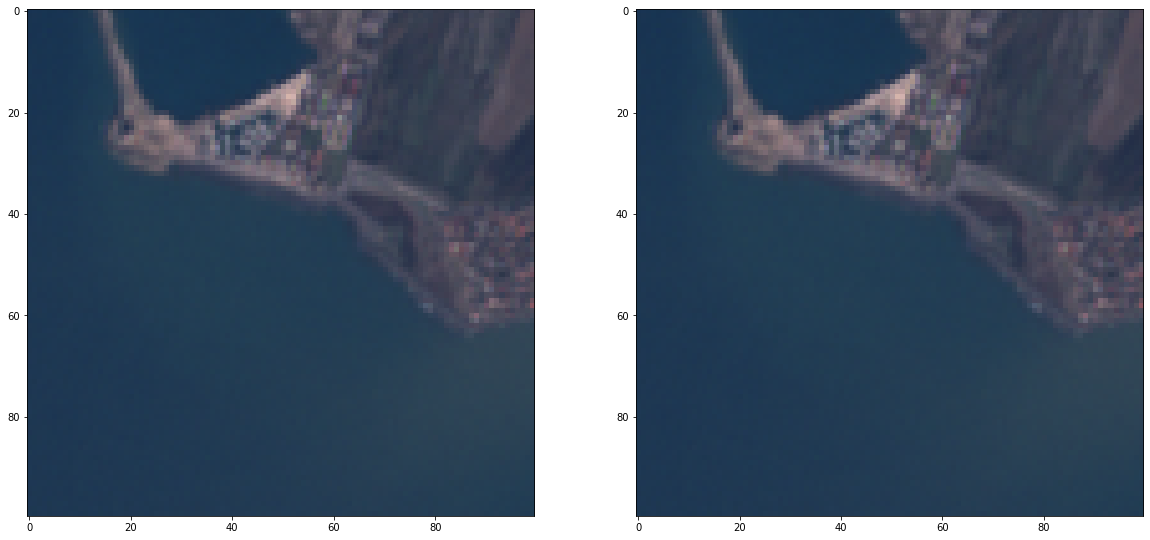

In [8]:
image_index = 1
plt.figure(figsize=(20,20))
plt.subplot2grid((1, 2), (0, 0)).imshow(proc_images[image_index][..., [3,2,1]] * 2.5, vmin=0, vmax=1);
plt.subplot2grid((1, 2), (0, 1)).imshow(wcs_images[image_index][..., [3,2,1]] * 2.5, vmin=0, vmax=1);

In [9]:
np.array_equal(proc_images, wcs_images)

True

In [10]:
proc_images[0,3,5,2], wcs_images[0,3,5,2]

(0.119, 0.119)